In [1]:
import pandas as pd
import numpy as np

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.ensemble import ExtraTreesClassifier
import operator
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
from subprocess import check_output


In [6]:
def datetounix(df):
    # Initialising unixtime list
    unixtime = []
    
    # Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))
    
    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [7]:
df_train = pd.read_csv('train_aWnotuB.csv', encoding='ISO-8859-1', engine='c')

In [8]:
df_train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [9]:
df_test = pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv', encoding='ISO-8859-1', engine='c')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [11]:
df_train['DateTime'] = pd.to_datetime(df_train['DateTime'])
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [12]:
df_test['Weekday'] = [datetime.weekday(date) for date in df_test.DateTime]
df_test['Year'] = [date.year for date in df_test.DateTime]
df_test['Month'] = [date.month for date in df_test.DateTime]
df_test['Day'] = [date.day for date in df_test.DateTime]
df_test['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_test.DateTime]
df_test['Week'] = [date.week for date in df_test.DateTime]
df_test['Quarter'] = [date.quarter for date in df_test.DateTime]

In [13]:
df_train['Weekday'] = [datetime.weekday(date) for date in df_train.DateTime]
df_train['Year'] = [date.year for date in df_train.DateTime]
df_train['Month'] = [date.month for date in df_train.DateTime]
df_train['Day'] = [date.day for date in df_train.DateTime]
df_train['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in df_train.DateTime]
df_train['Week'] = [date.week for date in df_train.DateTime]
df_train['Quarter'] = [date.quarter for date in df_train.DateTime]

In [14]:
tree_clf = ExtraTreesClassifier()

In [15]:
df_train_features = df_train.drop(['Vehicles'], axis=1)

# Convet timestamp to seconds
df_train_features = datetounix(df_train_features)

# store features in X array
X = df_train_features.values

# Store target feature in y array
y = df_train['Vehicles'].values

# fit the model
tree_clf.fit(X, y)


ExtraTreesClassifier()

Feature ranking:
feature 0 : DateTime (0.372269)
feature 7 : Time (0.355715)
feature 6 : Day (0.065738)
feature 3 : Weekday (0.060762)
feature 1 : Junction (0.052417)
feature 2 : ID (0.052004)
feature 8 : Week (0.030145)
feature 5 : Month (0.007334)
feature 9 : Quarter (0.002061)
feature 4 : Year (0.001556)


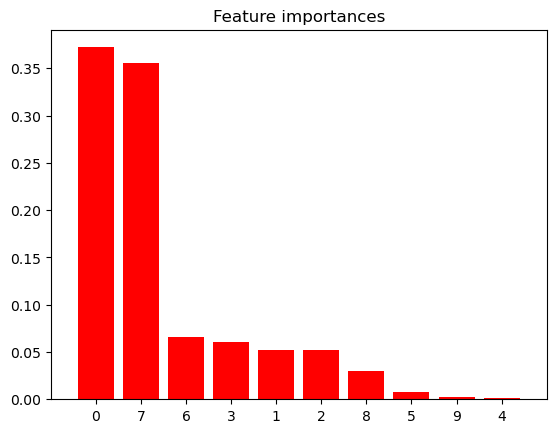

In [16]:
importances = tree_clf.feature_importances_
feature_names = df_train_features.columns.tolist()

feature_imp_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_imp_dict.items(), key=operator.itemgetter(1), reverse=True)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature %d : %s (%f)" % (indices[f], sorted_features[f][0], sorted_features[f][1]))

# Plot the feature importances of the forest
plt.figure(0)
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

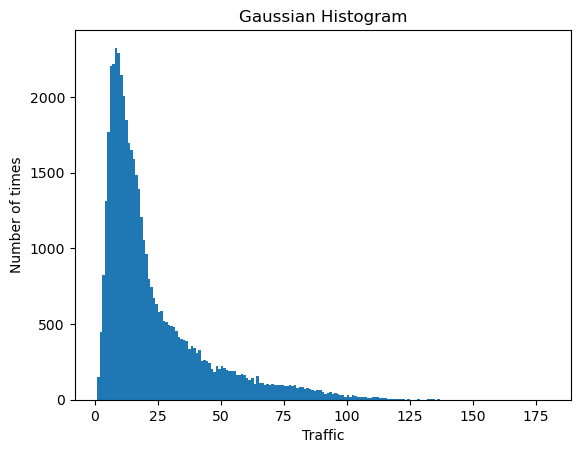

In [17]:
data = df_train.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.title("Gaussian Histogram")
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()

In [18]:
df_test_features = datetounix(df_test.drop(['Year', 'Quarter', 'Month', 'ID'], axis=1))

# Create X_test from the test set

X_test = df_test_features.values

######################################## Dropping Features from train set #######################

df_train_features = df_train.drop(['Vehicles','Year', 'Quarter', 'Month', 'ID'], axis=1)

# Convert timestamp to seconds
df_train_features = datetounix(df_train_features)

# store features in X array
X = df_train_features.values

# store target in y array
y = df_train['Vehicles'].values

In [19]:
df_solution = pd.DataFrame()
df_solution['ID'] = df_test.ID

# Starting time for time calculations
start_time = time.time()

# Create decision tree object
clf = DecisionTreeClassifier(criterion='gini', random_state = 13)

# fit the model
clf.fit(X, y)

# predict the outcome for testing data
predictions = clf.predict(X_test)

print("The time taken to execute is %s seconds" % (time.time() - start_time))

# Prepare Solution dataframe
df_solution['Vehicles'] = predictions
df_solution

The time taken to execute is 0.7166104316711426 seconds


,ID,Vehicles
0,20170701001,70
1,20170701011,62
2,20170701021,52
3,20170701031,39
4,20170701041,40
...,...,...
11803,20171031194,30
11804,20171031204,30
11805,20171031214,16
11806,20171031224,22
